In [1]:
import nltk 

In [2]:
#nltk.download_shell()

In [3]:
messages=[line.rstrip() for line in open('SMSSpamCollection')]

In [4]:
print(len(messages))

5574


In [5]:
messages[50]

'ham\tWhat you thinked about me. First time you saw me in class.'

In [6]:
for mess_no,message in enumerate(messages[:10]):
    print(mess_no,message)
    print('\n')
    

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [7]:
#We want to figure out which text messages are spam and which are ham

In [8]:
messages[0]  #We get that this has a tab separation

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [9]:
import pandas as pd

In [10]:
messages=pd.read_csv('SMSSpamCollection',sep='\t',names=['label','message'])

In [11]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [13]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [14]:
#Better the domain knowledge on the data , better it is for feature engineering

In [15]:
messages['length']=messages['message'].apply(len)

In [16]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [17]:
import matplotlib.pyplot as plt
#matplotlib inline

In [18]:
import seaborn as sns


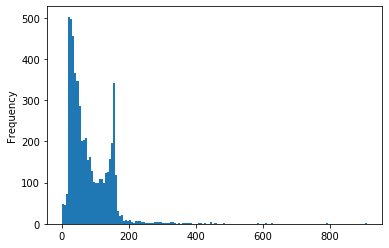

In [19]:
messages['length'].plot.hist(bins=150)

In [20]:
#Kinda looks like bimodal behavior

In [21]:
messages[messages['length']>600]

,label,message,length
1085,ham,For me the love should start with attraction.i...,910
1579,ham,How to Make a girl Happy? It's not at all diff...,611
1863,ham,The last thing i ever wanted to do was hurt yo...,790
2434,ham,Indians r poor but India is not a poor country...,629


In [22]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [23]:
messages[messages['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000015A873E2C48>,
      dtype=object)

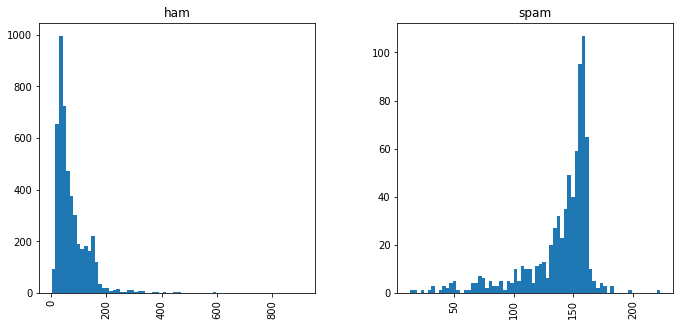

In [24]:
messages.hist(column='length',by='label',bins=70,figsize=(11,5))

In [25]:
#Lets move forward to text preprocessing
#For the classification algorithms we need some kind of numerical feature vector in order
#to perform the classification
#one of the most common ways of doing that is bag of words
#lets move forward to convert the raw messages , a sequence of characters to a sequence of 
#numbers i.e vectors

In [26]:
import string

In [27]:
#The first thing we wanna do is remove punctuation

In [28]:
mes='Here is a Sample!! It has a colon: and a question mark ?.'

In [29]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [30]:
#Lets use string comprehension to check whether it is present in the string or not

In [31]:
w_o_punc=[s for s in mes if s not in string.punctuation]

In [32]:
#w_o_punc  #No more punctuatuation

In [33]:
from nltk.corpus import stopwords  #we downloaded stopwords package, has words like "a , the " etc

In [34]:
stopwords.words('english')   #Common words that dont tell us any distinguishing features

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [35]:
w_o_punc=''.join(w_o_punc)  #It is a list of letters, so we join over ''. We can join over anything actually

In [36]:
w_o_punc

'Here is a Sample It has a colon and a question mark '

In [37]:
w_o_punc.split()

['Here',
 'is',
 'a',
 'Sample',
 'It',
 'has',
 'a',
 'colon',
 'and',
 'a',
 'question',
 'mark']

In [38]:
clean_mes=[word for word in w_o_punc.split() if word.lower() not in stopwords.words('english')]

In [39]:
clean_mes  #Removal of stop words

['Sample', 'colon', 'question', 'mark']

In [40]:
#Lets do this on actual messages data-set/frame
#For that i will create a function

In [41]:
#1.Remove punctuation
#2.Remove Stopwords
#3.Return list of text words
def text_process(mes):
    no_punc=[char for char in mes if char not in string.punctuation]
    no_punc=''.join(no_punc)
    mes_now=[word for word in no_punc.split() if word.lower() not in stopwords.words('english')]
    return mes_now
     

In [42]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [43]:
#lets see what our function does

In [44]:
messages['message'].head(5).apply(text_process)
#Therefore the stop words and punctuation is removed and a list of useful words is returned

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [45]:
#this is very simple method of text normalisation 
#for more check nltk documentation

In [46]:
#Now aftern tokenisation of the raw stream of words , we have to focus on vectorising 
#it so we can feed it into a machine learning model

In [47]:
#VECTORISATION  
#CountVectoriser estimator object
#Each vector will have as many dimensions as there are unique words in the SMS corpus.
#We will first use SciKit Learn's CountVectorizer. 
#This model will convert a collection of text documents to a matrix of token counts.
#We can imagine this as a 2-Dimensional matrix. 
#Where the 1-dimension is the entire vocabulary (1 row per word) and the other dimension are the actual documents,
#in this case a column per text message.

In [48]:
from sklearn.feature_extraction.text import CountVectorizer

In [49]:
#There are a lot of arguments and parameters that can be passed to the CountVectorizer.
#In this case we will just specify the analyzer to be our own previously defined function:

In [50]:
bgow_transformer=CountVectorizer(analyzer=text_process).fit(messages['message'])

In [51]:
print(len(bgow_transformer.vocabulary_)) #Looks like 11425 words in our vocabulary

11425


In [52]:
#Lets check it out
mes4=messages['message'][3]

In [53]:
print(mes4)

U dun say so early hor... U c already then say...


In [54]:
bow4=bgow_transformer.transform([mes4])


In [55]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [56]:
print(bow4.shape)

(1, 11425)


In [57]:
bgow_transformer.get_feature_names()[9554] #Twice words
bgow_transformer.get_feature_names()[4068]

'U'

In [58]:
messages_bgow=bgow_transformer.transform(messages['message'])

In [59]:
print('Shape of Sparse matrix: ',messages_bgow.shape)

Shape of Sparse matrix:  (5572, 11425)


In [61]:
messages_bgow.nnz  #Amount of non zero occurences


50548

In [63]:
 sparsity = (100.0 * messages_bgow.nnz / (messages_bgow.shape[0] * messages_bgow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


In [64]:
#Now we're done with counting, the term weights, and normalisation can be done 
#with TF-IDF
#Consider a document containing 100 words wherein the word cat appears 3 times.

#The term frequency (i.e., tf) for cat is then (3 / 100) = 0.03. Now, assume we 
#have 10 million documents and the word cat appears in one thousand of these.
#Then, the inverse document frequency (i.e., idf) is calculated as 
#log(10,000,000 / 1,000) = 4.
#Thus, the Tf-idf weight is the product of these quantities: 0.03 * 4 = 0.12.

In [65]:
from sklearn.feature_extraction.text import TfidfTransformer

In [66]:
tfidf_transformer=TfidfTransformer().fit(messages_bgow)

In [67]:
tfidf4=tfidf_transformer.transform(bow4)

In [70]:
print(tfidf4) #heres and Tf-idf weight relationship

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [73]:
tfidf_transformer.idf_[bgow_transformer.vocabulary_['dog']] #Checking frequency of a random word

7.546247245889701

In [74]:
#Now lets convert the entire bag of words corpus to tfid corpus at once

In [76]:
tfidf_messages=tfidf_transformer.transform(messages_bgow)

In [77]:
#Now as we have out messages represented as nummerical vecctors , we can
#finally train our spam-ham classifier
#Now we can actually use almost any sort of classification algorithms. For a variety 
#of reasons, the Naive Bayes classifier algorithm is a good choice.

In [79]:
from sklearn.naive_bayes import MultinomialNB  #Mutinomial naieve bayes theorem

In [80]:
spam_detect_model=MultinomialNB().fit(tfidf_messages,messages['label']) 

In [82]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [84]:
messages


,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [86]:
messages['label'][3] #hmmm looks like we are predicting correctly

'ham'

In [87]:
#now lets run this on all the messages of tfid

In [88]:
all_pred=spam_detect_model.predict(tfidf_messages)

In [89]:
 all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [90]:
#NOw above we acutually trained everthing on our training data 
#we should'nt be doing that , we need to split , to see the true predictive capability of our model

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
msg_train,msg_test,label_train,label_test=train_test_split(messages['message'],messages['label'],test_size=0.3) 

In [93]:
msg_train

1633    Hello my little party animal! I just thought I...
2405    Please give it 2  or i will pick it up on Tues...
3843    chile, please! It's only a  &lt;DECIMAL&gt;  h...
3740                           Did you stitch his trouser
4032    Sorry vikky, i'm Watching olave mandara movie ...
                              ...                        
2247    Hi ya babe x u 4goten bout me?' scammers getti...
3924    Okay lor... Will they still let us go a not ah...
5173                                                 U 2.
4395    Baaaaaaaabe! Wake up ! I miss you ! I crave yo...
5553                          Hahaha..use your brain dear
Name: message, Length: 3900, dtype: object

In [97]:
#Gotta repeat all the above steps on this training data, that's one way
#But since this is so common sklearn offers a data pipeline feature
#So we can have a entire pipeline of the word flow

In [98]:
from sklearn.pipeline import Pipeline


In [99]:
#So we don't have to repeat all the above process for all every set of data

In [100]:
pipeline=Pipeline([
    ('bgow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
    
])

In [101]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
         steps=[('bgow',
                 CountVectorizer(analyzer=<function text_process at 0x0000015A87423048>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [104]:
pip_predictions=pipeline.predict(msg_test)

In [105]:
from sklearn.metrics import classification_report

In [106]:
print(classification_report(label_test,pip_predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1468
        spam       1.00      0.70      0.82       204

    accuracy                           0.96      1672
   macro avg       0.98      0.85      0.90      1672
weighted avg       0.96      0.96      0.96      1672

